# Descriptive Exploration PUF and Counties Aggregate Data

DeSYNPuf, RWJF and BRFSS Aggregate Dataset

In [2]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

The file PUF_BRFSS_MERGED.csv contains aggregated Medicare data from 2008-2010 (DeSYNPuf Synthetic Public Use Files), RWJF County Health Factors and Outcomes Ranking Data from 2010, and BRFSS aggregated 2010 data for 302 out of the 3012 counties.

2960 out of 3012 counties (98%) had a Medicare beneficiary with at least one inpatient or outpatient claim filed between 2008 and 2010. 

The file PUF_BRFSS_MERGED_50.csv contains this same data, but counties with fewer than 50 Medicare beneficiaries were removed, leaving 491 counties for comparison.

In [3]:
medicare_counties = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_BRFSS_MERGED_50.csv")
medicare_counties.drop(columns=medicare_counties.columns[0], axis=1, inplace=True, errors="ignore")
medicare_counties.columns=medicare_counties.columns.str.strip()
medicare_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Columns: 104 entries, FIPS_STATE_CODE to ObeseWMean
dtypes: float64(93), int64(8), object(3)
memory usage: 399.1+ KB


Previously, I had showed counties with no claims.

This time there aren't any. 

In [5]:
no_claims = medicare_counties[medicare_counties["MEAN_AGE"].isnull()]
nc_summary = no_claims[["STATE", "COUNTY", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
nc_summary.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"])

,STATE,COUNTY,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK


## Mean Age, Sex and Race Codes

Mean Age of beneficiaries in a county is self-explanatory.

But Mean Sex and Race Codes? 

Here's my rationale.  Recoding Sex as 0=Female, and 1=Male the mean will show the mean proportion of males to females for the beneficiaries from that county. 

Race codes are organized with white as 1, and minority groups as 2-5, including "other".  The more diverse a county's beneficiary population is, the more it's Mean Race will trend away from 1.

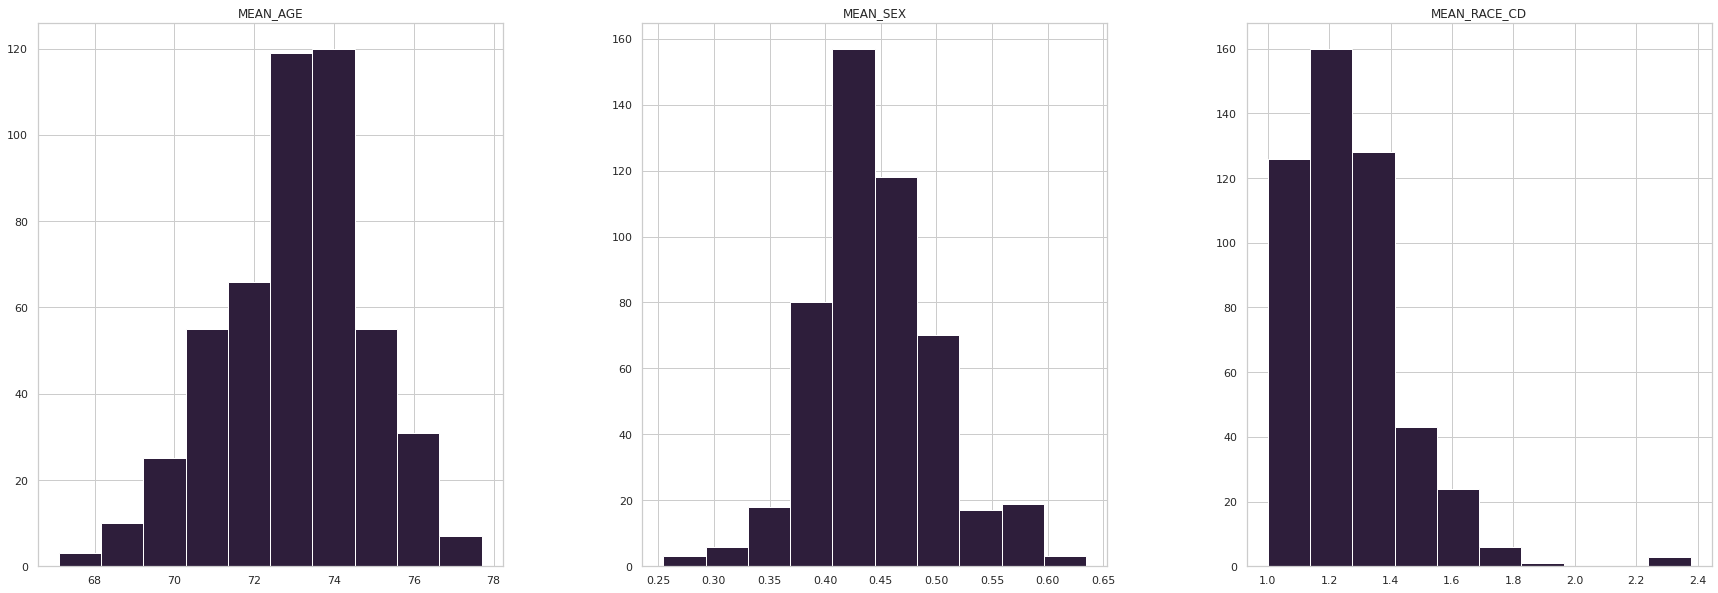

In [6]:
medicare_counties["MEAN_AGE"] = medicare_counties["MEAN_AGE"].round(decimals=1)

sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
medicare_counties.hist("MEAN_AGE", ax=axes[0])
medicare_counties.hist("MEAN_SEX", ax=axes[1])
medicare_counties.hist("MEAN_RACE_CD", ax=axes[2])
plt.show()

Mean age has now broadened out a bit, as has mean sex and race codes.  

We can see the diversity of the US better in this picture!  

We are now seeing a more urban population, compared to the one we saw before, where almost everyone was white and there were many more outliers in terms of small towns and beneficiary populations.

In [21]:
not_white = medicare_counties[medicare_counties["MEAN_RACE_CD"]>1.7]
nw = not_white[["STATE", "COUNTY", "MEAN_RACE_CD", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
nw.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"])

,STATE,COUNTY,MEAN_RACE_CD,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
127,Hawaii,Hawaii,2.354167,NaN,0.000,0.000
129,Hawaii,Maui,2.377358,NaN,0.250,0.250
39,California,Monterey,1.728814,"Salinas, CA",0.482,0.714
128,Hawaii,Honolulu,2.281553,"Honolulu, HI",0.750,0.750
40,California,Napa,1.886792,"Napa, CA",0.821,0.768
53,California,Santa Cruz,1.712121,"Santa Cruz-Watsonville, CA",0.857,0.857
50,California,San Mateo,1.753191,"San Francisco-San Mateo-Redwood City,CA",0.929,0.911


In [22]:
not_white2 = medicare_counties[(medicare_counties["MEAN_RACE_CD"]>1.5) & (medicare_counties["MEAN_RACE_CD"]<1.7)]
nw2 = not_white2[["STATE", "COUNTY", "MEAN_RACE_CD", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
nw2.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"])

,STATE,COUNTY,MEAN_RACE_CD,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
79,District of Columbia,District of Columbia,1.594156,Washington-Arlington-Alexandria DC-VA,0.000,0.000
58,California,Tulare,1.561404,"Visalia-Porterville, CA",0.000,0.125
35,California,Kern,1.627451,"Bakersfield-Delano, CA",0.018,0.089
16,Arizona,Mohave,1.588235,"Lake Havasu City-Kingman, AZ",0.067,0.267
435,Texas,Potter,1.602740,"Amarillo, TX",0.086,0.081
48,California,San Joaquin,1.511765,"Stockton, CA",0.089,0.321
45,California,San Bernardino,1.695349,"Riverside-San Bernardino-Ontario, CA",0.107,0.196
36,California,Los Angeles,1.596477,"Los Angeles-Long Beach-Santa Ana, CA",0.214,0.536
37,California,Los Angeles,1.596477,"Los Angeles-Long Beach-Santa Ana, CA",0.214,0.536
270,New Mexico,San Juan,1.557143,"Farmington, NM",0.219,0.656


In [23]:
young = medicare_counties[medicare_counties["MEAN_AGE"]<68]
y = young[["STATE", "COUNTY", "MEAN_AGE", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
y.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"]).head(10)

,STATE,COUNTY,MEAN_AGE,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
318,North Carolina,Randolph,67.6,"Greensboro-High Point, NC",0.590,0.870
229,Mississippi,Jackson,67.6,"Pascagoula, MS",0.827,0.827
28,Arkansas,Washington,67.1,"Fayetteville-Springdale-Rogers, AR-MO",0.973,0.973


In [25]:
female = medicare_counties[medicare_counties["MEAN_SEX"]<0.3]
f = female[["STATE", "COUNTY", "MEAN_SEX", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
f.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"]).head(10)

,STATE,COUNTY,MEAN_SEX,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
140,Illinois,Macon,0.254545,"Decatur, IL",0.079,0.139
104,Florida,Osceola,0.258427,"Orlando-Kissimmee-Sanford, FL",0.582,0.612
157,Indiana,Porter,0.283019,"Gary, IN",0.859,0.826


In [26]:
male = medicare_counties[medicare_counties["MEAN_SEX"]>0.6]
m = male[["STATE", "COUNTY", "MEAN_SEX", "CBSA_NAME", "HF_PROP_RANK", "HO_PROP_RANK"]]
m.sort_values(by=["HF_PROP_RANK", "HO_PROP_RANK"]).head(10)

,STATE,COUNTY,MEAN_SEX,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK
268,New Mexico,Dona Ana,0.606383,"Las Cruces, NM",0.406,0.844
474,West Virginia,Raleigh,0.634615,NaN,0.673,0.255
23,Arkansas,Craighead,0.627451,"Jonesboro, AR",0.920,0.707


## Case Counts

I carefully ensured that for each beneficiary there was only one possible positive case recorded for each chronic condition, so I could sum these the total number of cases of a particular condition among beneficiaries in a particular county.  

Let's see how these case counts correlate with the County Health Rankings, Total Costs and Stay Information, but first, let's face the fact - this is zero-heavy data.  We're glad about this, but if we don't do anything about it, outliers will skew correlation results.

Since we are interested in super-utilizers, let's try to identify those counties with the highest MEAN_INP_STAY and highest total costs (ALLCOSTS).

In [27]:
medicare_counties["ESRD_CASES"].value_counts(normalize=True)


12.0     0.057026
13.0     0.048880
10.0     0.046843
9.0      0.044807
14.0     0.042770
           ...   
117.0    0.002037
158.0    0.002037
77.0     0.002037
63.0     0.002037
70.0     0.002037
Name: ESRD_CASES, Length: 99, dtype: float64

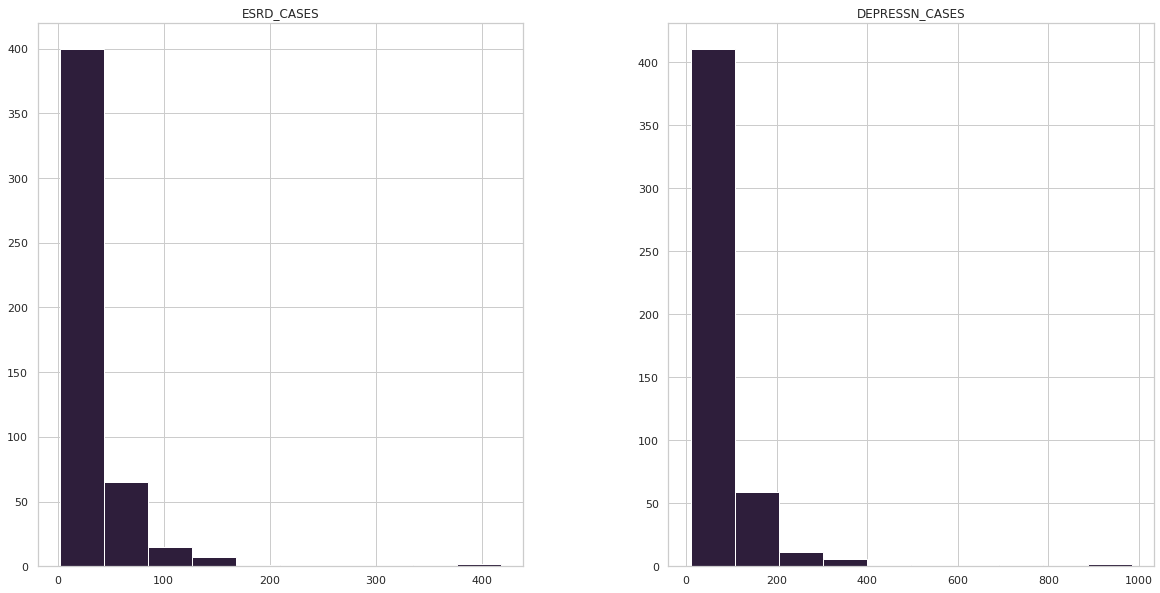

In [28]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("ESRD_CASES", ax=axes[0])
medicare_counties.hist("DEPRESSN_CASES", ax=axes[1])
plt.show()

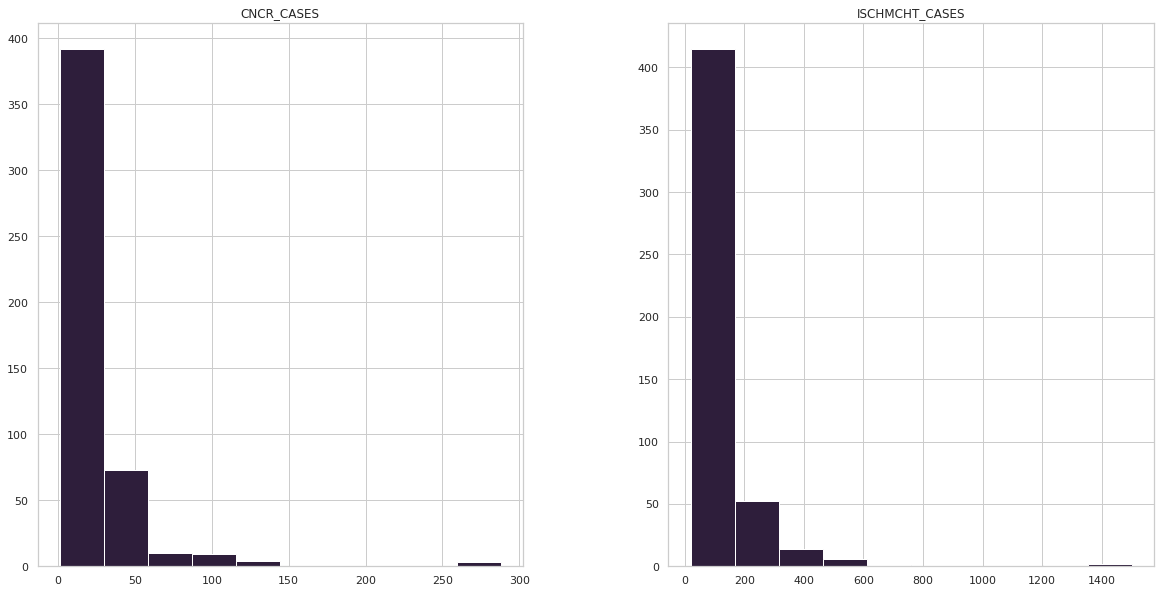

In [29]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
medicare_counties.hist("CNCR_CASES", ax=axes[0])
medicare_counties.hist("ISCHMCHT_CASES", ax=axes[1])
plt.show()

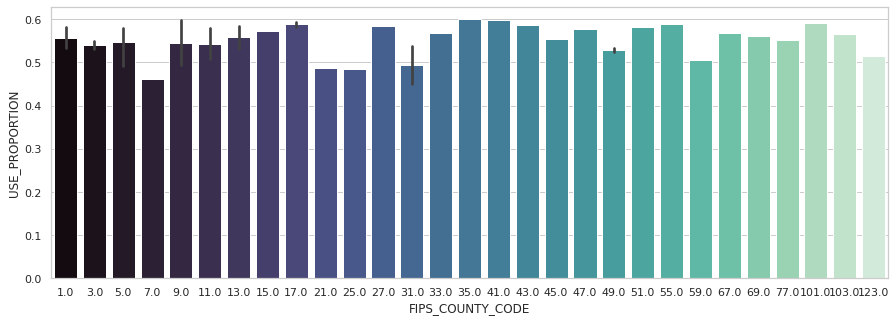

In [51]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x="FIPS_COUNTY_CODE", y="USE_PROPORTION", data=medicare_counties[medicare_counties["USE_PROPORTION"]<0.6], palette="mako");

In [53]:
lower_users = medicare_counties[medicare_counties["USE_PROPORTION"]<0.6]
lower_users[["STATE", "COUNTY", "MEAN_SEX", "MEAN_AGE", "MEAN_RACE_CD", "CBSA_NAME", 
                       "HF_PROP_RANK", "HO_PROP_RANK", "ALLCOSTS", "TOTAL_INP_DAYS", 
                       "DrinksPerDayWMean", "SmokerWMean"]]

,STATE,COUNTY,MEAN_SEX,MEAN_AGE,MEAN_RACE_CD,CBSA_NAME,HF_PROP_RANK,HO_PROP_RANK,ALLCOSTS,TOTAL_INP_DAYS,DrinksPerDayWMean,SmokerWMean
1,Alabama,Calhoun,0.466667,69.1,1.373333,"Anniston-Oxford, AL",0.552,0.313,4871596.0,312.0,NaN,NaN
2,Alabama,Etowah,0.410256,71.7,1.384615,"Gadsden, AL",0.582,0.493,2537332.0,155.0,NaN,NaN
10,Alabama,Morgan,0.347826,73.8,1.347826,"Decatur, AL",0.687,0.925,3868268.0,156.0,NaN,NaN
14,Arizona,Coconino,0.410714,74.0,1.267857,"Flagstaff, AZ",0.800,0.667,3534384.0,142.0,NaN,NaN
20,Arizona,Yuma,0.516667,72.4,1.366667,"Yuma, AZ",0.133,0.933,2408292.0,92.0,NaN,NaN
21,Arkansas,Baxter,0.500000,71.1,1.140000,NaN,0.840,0.893,2598990.0,93.0,NaN,NaN
23,Arkansas,Craighead,0.627451,70.3,1.235294,"Jonesboro, AR",0.920,0.707,1868298.0,73.0,NaN,NaN
24,Arkansas,Faulkner,0.571429,70.1,1.196429,"Little Rock-N.Little Rock-Conway,AR",0.960,0.947,3257434.0,133.0,NaN,NaN
60,Colorado,Adams,0.524138,74.5,1.227586,"Denver-Aurora-Broomfield, CO",0.125,0.357,7241992.0,424.0,0.006740,0.006381
62,Colorado,Boulder,0.495495,70.8,1.153153,"Boulder, CO",0.929,0.946,3242974.0,213.0,NaN,NaN


In [54]:
lower_users.shape

(41, 104)

In [55]:
medicare_counties["ALLCOSTS"].value_counts(normalize=True)

141207810.0    0.004073
6807530.0      0.002037
49651852.0     0.002037
13309080.0     0.002037
7735906.0      0.002037
                 ...   
18765338.0     0.002037
2061668.0      0.002037
1381736.0      0.002037
4871596.0      0.002037
10338314.0     0.002037
Name: ALLCOSTS, Length: 490, dtype: float64

In [56]:
medicare_counties["MEANCOSTS"].value_counts(normalize=True)

437.582777    0.004073
728.925373    0.002037
531.261988    0.002037
423.556645    0.002037
496.142494    0.002037
                ...   
286.700000    0.002037
458.062567    0.002037
446.156118    0.002037
503.029663    0.002037
515.303371    0.002037
Name: MEANCOSTS, Length: 490, dtype: float64

In [57]:
medicare_counties["TOTAL_INP_DAYS"].value_counts(normalize=True)

233.0     0.010183
187.0     0.008147
203.0     0.008147
147.0     0.008147
231.0     0.008147
            ...   
557.0     0.002037
301.0     0.002037
1295.0    0.002037
1140.0    0.002037
365.0     0.002037
Name: TOTAL_INP_DAYS, Length: 388, dtype: float64

In [58]:
medicare_counties["MEAN_INP_STAY"].value_counts(normalize=True)

5.000000    0.004073
5.500000    0.004073
4.000000    0.004073
5.428936    0.004073
4.973958    0.002037
              ...   
5.147727    0.002037
5.073099    0.002037
4.726852    0.002037
5.404915    0.002037
6.679348    0.002037
Name: MEAN_INP_STAY, Length: 487, dtype: float64

In [59]:
# Remove the outliers (we can explore them more later)
cc_reasonable = medicare_counties[(medicare_counties["ALLCOSTS"]<10000000) & (medicare_counties["TOTAL_INP_DAYS"]<2000) & (medicare_counties["TOTAL_CC_CASES"]<600) & (medicare_counties["TOTAL_CC_CASES"]>100)]


# Subset to higher utilzers
cc_case_counties = cc_reasonable[(cc_reasonable["ALLCOSTS"]>1000000) | (cc_reasonable["TOTAL_INP_DAYS"]>500)]
cc_case_counties.shape

(312, 104)

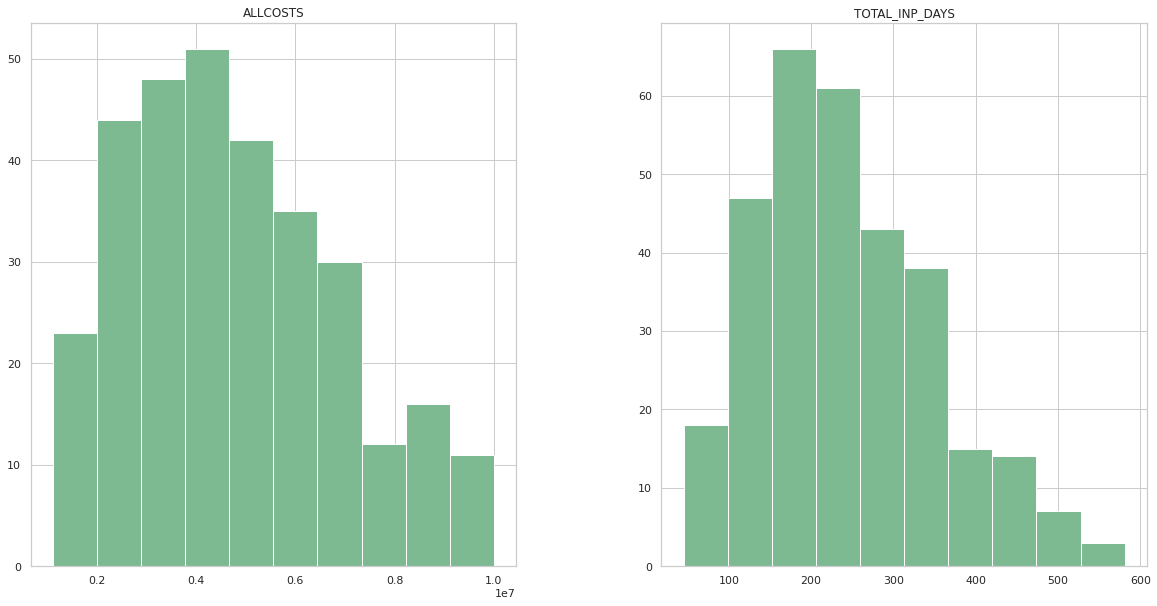

In [60]:
sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
cc_case_counties.hist("ALLCOSTS", ax=axes[0])
cc_case_counties.hist("TOTAL_INP_DAYS", ax=axes[1])
plt.show()

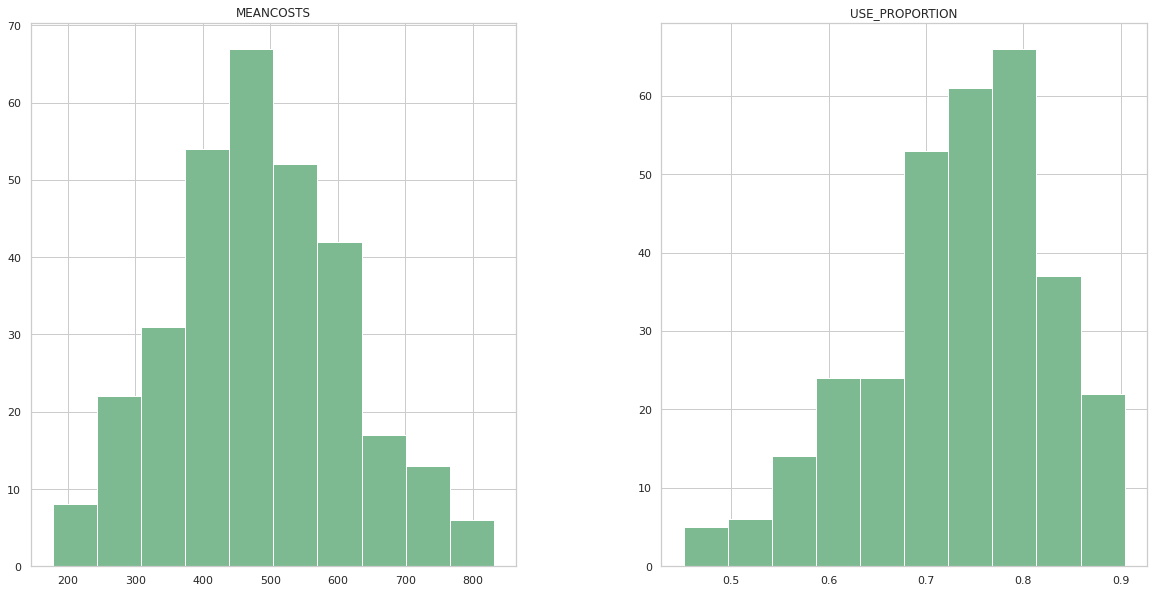

In [61]:
sb.set_theme(style="whitegrid", palette="crest")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
cc_case_counties.hist("MEANCOSTS", ax=axes[0])
cc_case_counties.hist("USE_PROPORTION", ax=axes[1])
plt.show()

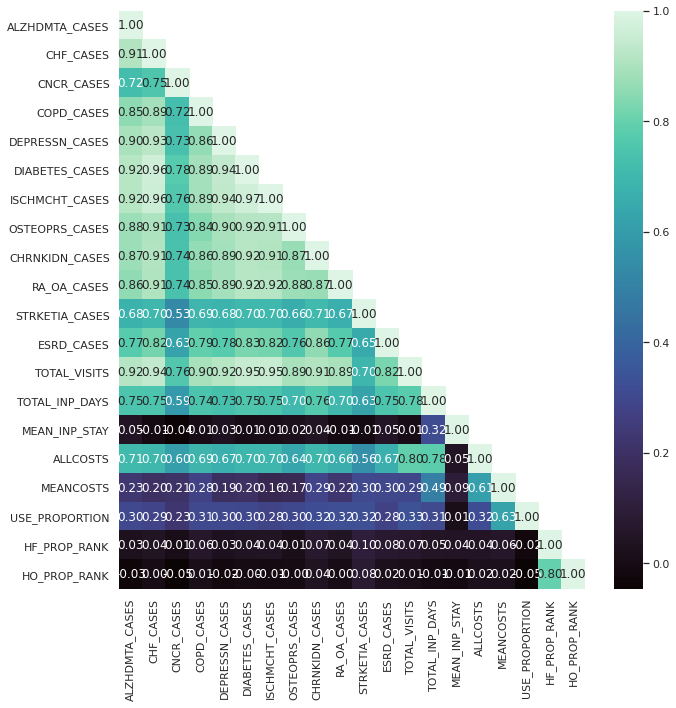

In [63]:
conditions = cc_case_counties[["ALZHDMTA_CASES", "CHF_CASES", "CNCR_CASES", "COPD_CASES", "DEPRESSN_CASES", 
                                "DIABETES_CASES", "ISCHMCHT_CASES", "OSTEOPRS_CASES", "CHRNKIDN_CASES", 
                                "RA_OA_CASES", "STRKETIA_CASES", "ESRD_CASES", "TOTAL_VISITS", "TOTAL_INP_DAYS",
                               "MEAN_INP_STAY", "ALLCOSTS", "MEANCOSTS", "USE_PROPORTION", "HF_PROP_RANK", "HO_PROP_RANK"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.tight_layout()
fig.savefig("counties_cases_heatmap.png")

In [64]:
cc_case_counties["TOTAL_CC_CASES"].describe()

count    312.000000
mean     314.128205
std      104.024837
min      127.000000
25%      238.750000
50%      295.500000
75%      376.750000
max      599.000000
Name: TOTAL_CC_CASES, dtype: float64

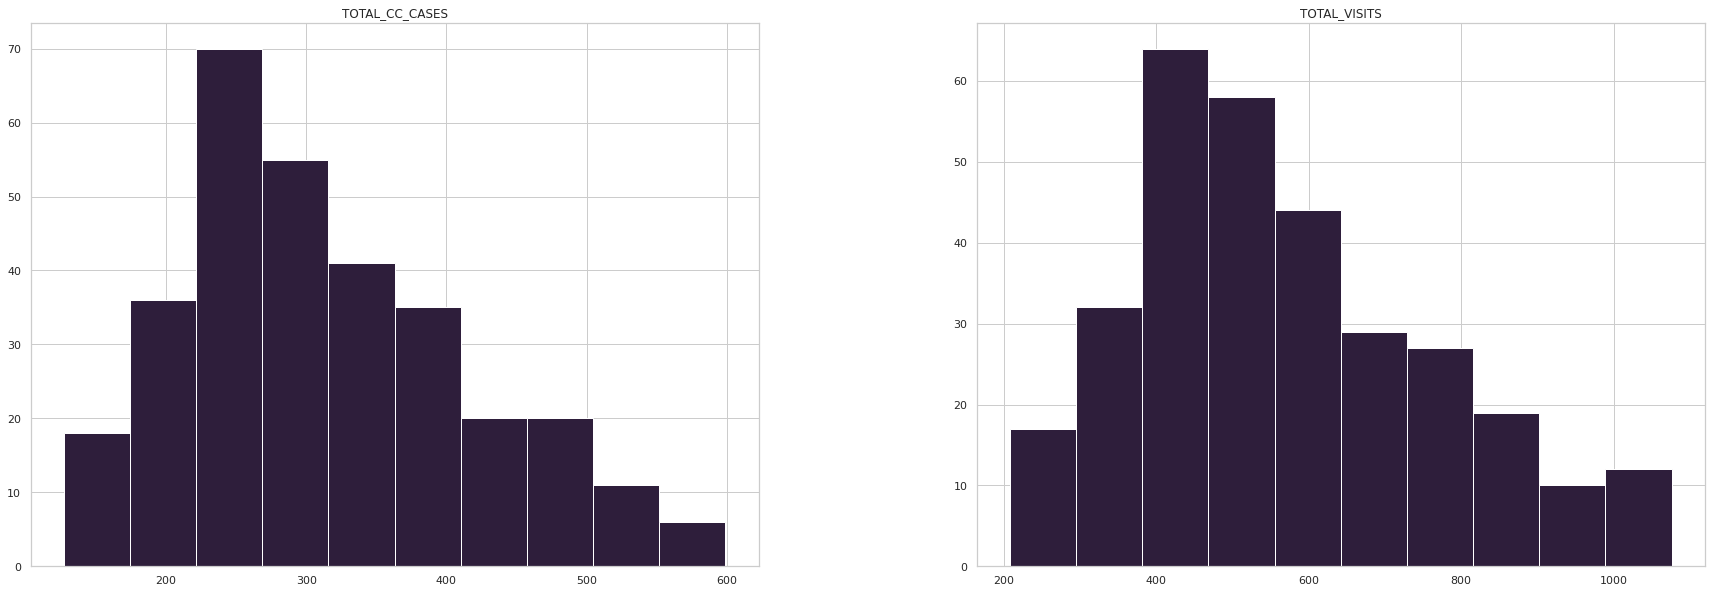

In [65]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))
cc_case_counties.hist("TOTAL_CC_CASES", ax=axes[0])
cc_case_counties.hist("TOTAL_VISITS", ax=axes[1])
plt.show()

So, these are our 312 Super-Utilizers (but not the Super-Duper Outliers; we can tackle them later).


In [68]:
cc = cc_case_counties[["STATE", "COUNTY", "MEAN_AGE", "MEAN_RACE_CD", 
                       "HF_PROP_RANK", "HO_PROP_RANK", "ALLCOSTS", "MEANCOSTS", "TOTAL_INP_DAYS", 
                       "MEAN_INP_STAY"]]

cc_super_states = cc.groupby(["STATE", "COUNTY"]).aggregate({"ALLCOSTS":"sum", "MEANCOSTS":"mean",
                                                             "TOTAL_INP_DAYS":"sum", "MEAN_INP_STAY":"mean",
                                                             "MEAN_AGE":"mean", "MEAN_RACE_CD":"mean",
                                                            "HF_PROP_RANK":"mean", "HO_PROP_RANK":"mean"})
cc_super_states.sort_values(by="ALLCOSTS", ascending=False).head(20)

,,ALLCOSTS,MEANCOSTS,TOTAL_INP_DAYS,MEAN_INP_STAY,MEAN_AGE,MEAN_RACE_CD,HF_PROP_RANK,HO_PROP_RANK
STATE,COUNTY,,,,,,,,
Louisiana,Caddo,9999944.0,490.938552,286.0,3.620760,71.0,1.356061,0.688,0.438
Ohio,Lake,9837300.0,692.093567,404.0,5.449550,74.2,1.094737,0.807,0.852
Michigan,Washtenaw,9651634.0,622.537954,501.0,6.057353,72.2,1.188119,0.988,0.915
Arizona,Yavapai,9468926.0,496.142494,394.0,5.156746,70.2,1.343511,0.867,0.533
Kentucky,Fayette,9420848.0,613.574671,288.0,4.014706,71.3,1.118280,0.983,0.917
California,Placer,9393820.0,571.732222,295.0,5.505208,75.3,1.660000,0.964,0.893
Ohio,Butler,9334294.0,538.689316,581.0,5.217687,73.1,1.192308,0.455,0.432
Illinois,Rock Island,9323692.0,655.102513,357.0,6.045977,73.5,1.166667,0.396,0.614
North Carolina,Cumberland,9303972.0,520.006648,310.0,4.076608,73.0,1.188034,0.460,0.460
